<a href="https://colab.research.google.com/github/mmilannaik/Campus-DL/blob/main/100DL_S19_Batch_vs_stochastic_GD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import time

In [3]:
df = pd.read_csv('Social_Network_Ads.csv')

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df = df[['Age','EstimatedSalary','Purchased']]

In [6]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [7]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [8]:
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [10]:
X_scaled.shape

(400, 2)

In [ ]:
#from sklearn.model_selection import train_test_split
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
#X_train.shape

In [11]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [12]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 151 (604.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
#start = time.time()
history = model.fit(X_scaled,y,epochs=500,batch_size=1,validation_split=0.2)
#print(time.time() - start)

Epoch 1/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4679 - loss: 0.7603 - val_accuracy: 0.6625 - val_loss: 0.6683
Epoch 2/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7450 - loss: 0.5403 - val_accuracy: 0.9125 - val_loss: 0.5149
Epoch 3/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8501 - loss: 0.3455 - val_accuracy: 0.9375 - val_loss: 0.3931
Epoch 4/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8366 - loss: 0.3280 - val_accuracy: 0.9000 - val_loss: 0.3523
Epoch 5/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8590 - loss: 0.2861 - val_accuracy: 0.9000 - val_loss: 0.3166
Epoch 6/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8578 - loss: 0.2657 - val_accuracy: 0.9000 - val_loss: 0.2932
Epoch 7/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8300 - loss: 0.3142 - val_accuracy: 0.9125 - val_loss: 0.2723
Epoch 8/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8763 - loss: 0.2886 - val_accu

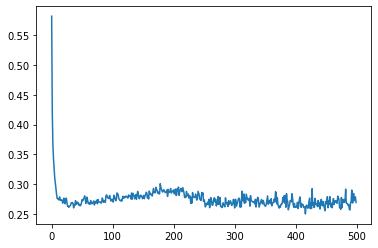

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

In [15]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [16]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
#start = time.time()
history = model.fit(X_scaled,y,epochs=10,batch_size=250,validation_split=0.2)
#print(time.time() - start)

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 276ms/step - accuracy: 0.5330 - loss: 0.7783 - val_accuracy: 0.3625 - val_loss: 1.0365
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6087 - loss: 0.7778 - val_accuracy: 0.3625 - val_loss: 1.0254
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.6583 - loss: 0.7650 - val_accuracy: 0.3625 - val_loss: 1.0074
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6637 - loss: 0.7592 - val_accuracy: 0.3625 - val_loss: 0.9906
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.6755 - loss: 0.7553 - val_accuracy: 0.3625 - val_loss: 0.9775
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.6869 - loss: 0.7480 - val_accuracy: 0.3625 - val_loss: 0.9608
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6903 - loss: 0.7434 - val_accuracy: 0.3625 - val_loss: 0.9464
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.6884 - loss: 0.7396 - val_accuracy: 0.3625 - val_loss: 0.9334

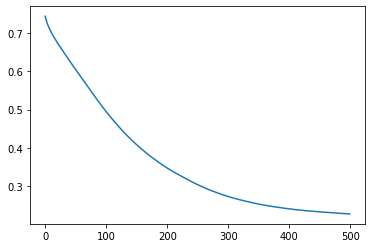

In [ ]:
plt.plot(history.history['loss'])